### Récupération du dataset

In [1]:
import kagglehub as kh
import pandas as pd

# Télécharger le dataset dans un dossier local
dataset_ref = "dileep070/heart-disease-prediction-using-logistic-regression"
path = kh.dataset_download(dataset_ref)

# Localiser le fichier CSV dans le dossier téléchargé
csv_file = f"{path}/framingham.csv"

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(csv_file)

# Afficher les premières lignes
display(df.head())


d:\Sources\DS-Machine-Learning\AdvancedML\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### Gestion des doublons et valeurs manquantes

In [3]:
# Vérifier l'absence de doublons
print(df.duplicated().sum())

# Education : remplacer les valeurs manquantes par la valeur la plus fréquente
df['education'] = df['education'].fillna(df['education'].mode()[0])

# Cigs Per Day : vérifier si les valeurs manquantes correspondent à des non-fumeurs
#display(df.loc[df['cigsPerDay'].isna()])

# Ce sont des fumeurs, on remplace les valeurs manquantes par la médiane
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())

# BPMeds : remplacer les valeurs manquantes par la valeur la plus fréquente
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])

# TotChol : remplacer les valeurs manquantes par la médiane
df['totChol'] = df['totChol'].fillna(df['totChol'].median())

# BMI : remplacer les valeurs manquantes par la médiane
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

# HeartRate : remplacer les valeurs manquantes par la médiane
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

# Glucose : remplacer les valeurs manquantes par la médiane
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

# Vérifier l'absence de valeurs nulles
print(df.isna().sum())

0
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


### Vérification de la validité des données

In [4]:
# Vérifier l'ensemble des valeurs distinctes pour les données catégorielles
print(df['male'].unique())
print(df['education'].unique())
print(df['currentSmoker'].unique())
print(df['BPMeds'].unique())
print(df['prevalentStroke'].unique())
print(df['prevalentHyp'].unique())
print(df['diabetes'].unique())
print(df['TenYearCHD'].unique())

[1 0]
[4. 2. 1. 3.]
[0 1]
[0. 1.]
[0 1]
[0 1]
[0 1]
[0 1]


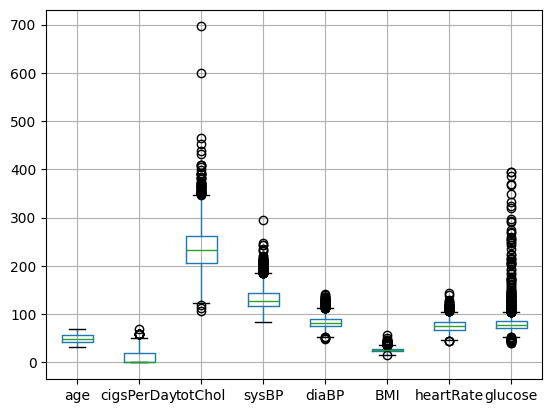

In [5]:
# Vérifier la distribution des données quantitatives avec des boxplots
import matplotlib.pyplot as plt
df.boxplot(column=['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'])
plt.show()
# Les données semblent cohérentes

### Preprocessing

In [6]:
# Séparation features / target
X = df.drop(columns='TenYearCHD')
y = df['TenYearCHD']

# Séparation training / testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:

# Encodage niveau d'éducation en données indicatrices
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output= False)
cols_to_encode =  ['education']
education_train_enc = ohe.fit_transform(X_train[cols_to_encode])
education_test_enc = ohe.transform(X_test[cols_to_encode])

education_train_df = pd.DataFrame(education_train_enc,index=X_train.index,columns=ohe.get_feature_names_out(cols_to_encode))
education_test_df = pd.DataFrame(education_test_enc,index=X_test.index,columns=ohe.get_feature_names_out(cols_to_encode))

X_train = pd.concat([X_train.drop(cols_to_encode,axis=1),education_train_df],axis=1)
X_test = pd.concat([X_test.drop(cols_to_encode,axis=1),education_test_df],axis=1)

X_test.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0
3188,1,63,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,1.0,0.0,0.0,0.0
764,1,45,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0,0.0,0.0,1.0,0.0
3264,0,51,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0,1.0,0.0,0.0,0.0
1967,1,45,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0,0.0,0.0,1.0,0.0
2185,0,45,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0,0.0,1.0,0.0,0.0


In [8]:
# Standardisation des variables quantitatives
from sklearn.preprocessing import StandardScaler
num_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])

X_test.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0
3188,1,1.571597,0,-0.755491,0.0,0,1,0,-1.053123,0.705818,0.586272,0.314906,-0.334872,0.193022,1.0,0.0,0.0,0.0
764,1,-0.527305,0,-0.755491,0.0,0,0,0,-1.682645,-0.334133,0.502695,0.521882,0.754747,0.060555,0.0,0.0,1.0,0.0
3264,0,0.172329,1,-0.587499,0.0,0,0,0,0.543165,-0.243702,-0.165921,-1.362821,-0.083421,0.634580,1.0,0.0,0.0,0.0
1967,1,-0.527305,1,1.764381,0.0,0,0,0,0.295853,-0.288918,0.544483,0.692334,-0.083421,0.457957,0.0,0.0,1.0,0.0
2185,0,-0.527305,1,-0.503504,0.0,0,0,0,0.295853,-0.108057,-0.249498,-1.362821,1.173832,0.193022,0.0,1.0,0.0,0.0


### Modèle de régression logistique, sans rééquilibrage

In [10]:
# Entraîner un modèle de régression logistique
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédire les classes sur le jeu de test
y_pred = model.predict(X_test)

display(pd.crosstab(y_test,y_pred,rownames=["Réel"],colnames=["Pérdit"]))

from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test,y_pred))


Pérdit,0,1
Réel,,
0,719,5
1,114,10


                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.99      0.08      0.92      0.28      0.09       724
          1       0.67      0.08      0.99      0.14      0.28      0.07       124

avg / total       0.83      0.86      0.21      0.81      0.28      0.09       848



### Oversampling

In [11]:
# avec RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ro, y_ro = ros.fit_resample(X_train,y_train)
print("Avec ROS :",y_ro.value_counts())

# Entraînement régression logistique avec nouvel échantillonnage
model = LogisticRegression()
model.fit(X_ro, y_ro)

# Prédire les classes sur le jeu de test
y_pred = model.predict(X_test)

display(pd.crosstab(y_test,y_pred,rownames=["Réel"],colnames=["Prédit"]))

print(classification_report_imbalanced(y_test,y_pred))

Avec ROS : TenYearCHD
0    2870
1    2870
Name: count, dtype: int64


Prédit,0,1
Réel,,
0,482,242
1,43,81


                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.67      0.65      0.77      0.66      0.44       724
          1       0.25      0.65      0.67      0.36      0.66      0.43       124

avg / total       0.82      0.66      0.66      0.71      0.66      0.44       848



In [12]:
# avec SMOTE
from imblearn.over_sampling import SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train,y_train)
print("Avec SMO :",y_sm.value_counts())

# Entraînement régression logistique avec nouvel échantillonnage
model = LogisticRegression()
model.fit(X_sm, y_sm)

# Prédire les classes sur le jeu de test
y_pred = model.predict(X_test)

display(pd.crosstab(y_test,y_pred,rownames=["Réel"],colnames=["Prédit"]))

print(classification_report_imbalanced(y_test,y_pred))

Avec SMO : TenYearCHD
0    2870
1    2870
Name: count, dtype: int64


Prédit,0,1
Réel,,
0,476,248
1,52,72


                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.66      0.58      0.76      0.62      0.38       724
          1       0.23      0.58      0.66      0.32      0.62      0.38       124

avg / total       0.80      0.65      0.59      0.70      0.62      0.38       848



### Undersampling

In [13]:
# avec ClusterCentroids
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X_train,y_train)
print("Avec CC :",y_cc.value_counts())

# Entraînement régression logistique avec nouvel échantillonnage
model = LogisticRegression()
model.fit(X_cc, y_cc)

# Prédire les classes sur le jeu de test
y_pred = model.predict(X_test)

display(pd.crosstab(y_test,y_pred,rownames=["Réel"],colnames=["Prédit"]))

print(classification_report_imbalanced(y_test,y_pred))

Avec CC : TenYearCHD
0    520
1    520
Name: count, dtype: int64


Prédit,0,1
Réel,,
0,414,310
1,39,85


                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.57      0.69      0.70      0.63      0.39       724
          1       0.22      0.69      0.57      0.33      0.63      0.40       124

avg / total       0.81      0.59      0.67      0.65      0.63      0.39       848



In [15]:
# avec RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_ru, y_ru = rus.fit_resample(X_train,y_train)
print("Avec RUS :",y_ru.value_counts())

# Entraînement régression logistique avec nouvel échantillonnage
model = LogisticRegression()
model.fit(X_ru, y_ru)

# Prédire les classes sur le jeu de test
y_pred = model.predict(X_test)

display(pd.crosstab(y_test,y_pred,rownames=["Réel"],colnames=["Prédit"]))

print(classification_report_imbalanced(y_test,y_pred))

Avec RUS : TenYearCHD
0    520
1    520
Name: count, dtype: int64


Prédit,0,1
Réel,,
0,473,251
1,46,78


                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.65      0.63      0.76      0.64      0.41       724
          1       0.24      0.63      0.65      0.34      0.64      0.41       124

avg / total       0.81      0.65      0.63      0.70      0.64      0.41       848



### Combinaison Oversampling / Undersampling

In [16]:
# avec SMOTETomek
from imblearn.combine import SMOTETomek
smoto = SMOTETomek()
X_st, y_st = smoto.fit_resample(X_train,y_train)
print("Avec SMOTETomek :",y_st.value_counts())

# Entraînement régression logistique avec nouvel échantillonnage
model = LogisticRegression()
model.fit(X_st, y_st)

# Prédire les classes sur le jeu de test
y_pred = model.predict(X_test)

display(pd.crosstab(y_test,y_pred,rownames=["Réel"],colnames=["Prédit"]))

print(classification_report_imbalanced(y_test,y_pred))

Avec SMOTETomek : TenYearCHD
0    2861
1    2861
Name: count, dtype: int64


Prédit,0,1
Réel,,
0,471,253
1,50,74


                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.65      0.60      0.76      0.62      0.39       724
          1       0.23      0.60      0.65      0.33      0.62      0.39       124

avg / total       0.80      0.64      0.60      0.69      0.62      0.39       848



### Ajustement du seuil de probabilité

In [ ]:
# On va utiliser RandomOverSampler, c'est lui qui donnait les meilleurs résultats

# Entraînement régression logistique avec échantillonnage ROS
model = LogisticRegression()
model.fit(X_ro, y_ro)

# Prédire les probabilités de classes sur le jeu de test
y_pred_proba = model.predict_proba(X_test)

# Ajuster le seuil de probabilité pour détecter plus de positifs
threshold = 0.4
y_pred = (y_pred_proba[:,1] >= threshold).astype('int')

display(pd.crosstab(y_test,y_pred,rownames=["Réel"],colnames=["Prédit"]))

print(classification_report_imbalanced(y_test,y_pred))

Prédit,0,1
Réel,,
0,357,367
1,25,99


                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.49      0.80      0.65      0.63      0.38       724
          1       0.21      0.80      0.49      0.34      0.63      0.41       124

avg / total       0.83      0.54      0.75      0.60      0.63      0.39       848



### Pondération des classes

In [19]:
# Pas de rééchantillonnage, mais affectation d'un poids différent aux classes
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Prédire les classes sur le jeu de test
y_pred = model.predict(X_test)

display(pd.crosstab(y_test,y_pred,rownames=["Réel"],colnames=["Prédit"]))

print(classification_report_imbalanced(y_test,y_pred))

Prédit,0,1
Réel,,
0,471,253
1,44,80


                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.65      0.65      0.76      0.65      0.42       724
          1       0.24      0.65      0.65      0.35      0.65      0.42       124

avg / total       0.82      0.65      0.65      0.70      0.65      0.42       848



### Méthodes d'ensemble

In [ ]:
# avec EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier

brfc = EasyEnsembleClassifier()
brfc.fit(X_train,y_train)

y_pred = brfc.predict(X_test)

display(pd.crosstab(y_test,y_pred,rownames=["Réel"],colnames=["Prédit"]))

print(classification_report_imbalanced(y_test,y_pred))

Prédit,0,1
Réel,,
0,440,284
1,42,82


                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.61      0.66      0.73      0.63      0.40       724
          1       0.22      0.66      0.61      0.33      0.63      0.40       124

avg / total       0.81      0.62      0.65      0.67      0.63      0.40       848

